## Задача: Предсказать дождь на следующий день

**Подключение библиотек**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных <a class='anchor' id='load'>

**Описание датасета**

* **Date** - Дата
* **Location** - Место нахождения
* **MinTemp** - Минимальная температура
* **MaxTemp** -	Максимальная температура
* **Rainfall** - Осадки
* **Evaporation** - Испарение
* **Sunshine** - Солнечный свет
* **WindGustDir** - Wind Gust Dir
* **WindGustSpeed** - Скорость порыва ветра
* **WindDir9am** - Wind Dir 9:00
* **WindDir3pm** - Wind Dir 15:00
* **WindSpeed9am** - Скорость ветра 9:00
* **WindSpeed3pm** - Скорость ветра 15:00
* **Humidity9am** - Влажность 9:00
* **Humidity3pm** - Влажность 15:00
* **Pressure9am** - Давление 9:00
* **Pressure3pm** - Давление 15:00
* **Cloud9am** - Облачность 9:00
* **Cloud3pm** - Облачность 15:00
* **Temp9am** - Температура 9:00
* **Temp3pm** - Температура 15:00
* **RainToday** - Дождь сегодня
* **RainTomorrow** - Дождь завтра

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Количественные переменные**

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Категориальные переменные**

In [5]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [6]:
def view_categorical_features(df, categorical_columns):
    for column in categorical_columns:
        print(f'Column - {column}: пропусков - {df[column].isna().sum()}\n{df[column].unique()[:5]}\n')

view_categorical_features(df, categorical_columns)

Column - Date: пропусков - 0
['2008-12-01' '2008-12-02' '2008-12-03' '2008-12-04' '2008-12-05']

Column - Location: пропусков - 0
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree']

Column - WindGustDir: пропусков - 10326
['W' 'WNW' 'WSW' 'NE' 'NNW']

Column - WindDir9am: пропусков - 10566
['W' 'NNW' 'SE' 'ENE' 'SW']

Column - WindDir3pm: пропусков - 4228
['WNW' 'WSW' 'E' 'NW' 'W']

Column - RainToday: пропусков - 3261
['No' 'Yes' nan]

Column - RainTomorrow: пропусков - 3267
['No' 'Yes' nan]



### Приведение типов

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
# целевая переменная
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [9]:
# заменим значения целевой переменной на 0 и 1:
binary_to_numbers = {'No': 0, 'Yes': 1}
df['RainTomorrow'] = df['RainTomorrow'].replace(binary_to_numbers)
df['RainToday'] = df['RainToday'].replace(binary_to_numbers)

In [10]:
# преобразуем значение даты в количество дней с 1970-01-01
df['Date'] = (pd.to_datetime(df['Date'])- pd.Timestamp('1970-01-01')) // pd.Timedelta('1days')

In [11]:
# Наименования метеостанций
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
# С помощью google maps определим координаты этих метеостанций
stations = {
    'Albury': [-36.065983, 146.933757],
    'BadgerysCreek': [-33.874789, 150.742198],
    'Cobar': [-31.498089, 145.840004],
    'CoffsHarbour': [-30.302664, 153.121074],
    'Moree': [-29.466090, 149.841702],
    'Newcastle': [-32.928553, 151.780644],
    'NorahHead': [-33.282690, 151.565798],
    'NorfolkIsland': [-29.045021, 167.946025],
    'Penrith': [-23.108893, 143.611796],
    'Richmond': [-20.732187, 143.143603],
    'Sydney': [-33.865255, 151.216484],
    'SydneyAirport': [-33.939820, 151.178658],
    'WaggaWagga': [-35.130577, 147.369054],
    'Williamtown': [-32.795088, 151.853003],
    'Wollongong': [-34.390606, 150.879616],
    'Canberra': [-35.306904, 149.125529],
    'Tuggeranong': [-35.407187, 149.102398],
    'MountGinini': [-35.533333, 148.783333],
    'Ballarat': [-37.558485, 143.855087],
    'Bendigo': [-36.753422, 144.279909],
    'Sale': [-38.103693, 147.068100],
    'MelbourneAirport': [-37.673333, 144.843333],
    'Melbourne': [-37.813747, 144.963005],
    'Nhil': [-36.332988, 141.650199],    
    'Mildura': [-37.558485, 143.855087],
    'Nhil': [-36.332988, 141.650199],
    'Portland': [-38.358293, 141.609900],
    'Watsonia': [-37.711887, 145.083003],
    'Dartmoor': [-37.927392, 141.276500],
    'Brisbane': [-27.468545, 153.024029],
    'Cairns': [-16.922018, 145.776439],
    'GoldCoast': [-28.001431, 153.363484],
    'Townsville': [-19.252226, 146.813347],
    'Adelaide': [-34.951652, 138.593834],
    'MountGambier': [-37.752367, 140.786152],
    'Nuriootpa': [-34.487174, 138.975699],
    'Woomera': [-37.398593, 140.335999],
    'Albany': [-35.009677, 117.884181],
    'Witchcliffe': [-34.025494, 115.100904],
    'PearceRAAF': [-31.667778, 116.015],
    'PerthAirport': [-31.940326, 115.966769],    
    'Perth': [-32.088410, 115.895122],
    'SalmonGums': [-32.98, 121.645],
    'Walpole': [-34.975391, 116.734796],
    'Hobart': [-42.859536, 147.309693],
    'Launceston': [-41.446690, 147.139202],    
    'AliceSprings': [-23.723467, 133.883826],
    'Darwin': [-12.465673, 130.842738],
    'Katherine': [-14.465293, 132.263199],
    'Uluru': [-25.345400, 131.033856]
}

In [13]:
# Создадим датафрем с наименованиями станций и их координатами
sdf = pd.DataFrame({'Location': stations.keys(), 'coordinate': stations.values()})
sdf['longitude'] = sdf['coordinate'].apply(lambda x: x[0])
sdf['latitude'] = sdf['coordinate'].apply(lambda x: x[1])
sdf.drop('coordinate', axis=1, inplace=True)
sdf.head()

,Location,longitude,latitude
0,Albury,-36.065983,146.933757
1,BadgerysCreek,-33.874789,150.742198
2,Cobar,-31.498089,145.840004
3,CoffsHarbour,-30.302664,153.121074
4,Moree,-29.466090,149.841702


In [14]:
# Добавим координаты станций в исследуемый data frame
df = df.merge(sdf, on=['Location'], how='left')

# Присвоим станциям номера 
Location = {name: i for i, name in enumerate(stations)}

# и заменим их наименования на номера
df['Location'] = df['Location'].replace(Location)

# cформируем корректный data frame
columns = list(df.columns[:2]) + list(df.columns[-2:]) + list(df.columns[2:-2])
df = df[columns]
df.head()

,Date,Location,longitude,latitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,14214,0,-36.065983,146.933757,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,14215,0,-36.065983,146.933757,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,14216,0,-36.065983,146.933757,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,14217,0,-36.065983,146.933757,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,14218,0,-36.065983,146.933757,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [15]:
# Оставшиеся категориальные переменные представляют собой направление верта
# Заменим их на прядковые номера значений их азимутов
cardinal_points = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
cardinal_points = {i: cardinal_points.index(i) for i in cardinal_points}
for key, value in cardinal_points.items(): print(f'{key:<4} - {value:>2}', end='\t')
for col in categorical_columns:
    df[col] = df[col].replace(cardinal_points)

N    -  0	NNE  -  1	NE   -  2	ENE  -  3	E    -  4	ESE  -  5	SE   -  6	SSE  -  7	S    -  8	SSW  -  9	SW   - 10	WSW  - 11	W    - 12	WNW  - 13	NW   - 14	NNW  - 15	

In [16]:
view_categorical_features(df, categorical_columns)

Column - Date: пропусков - 0
[14214 14215 14216 14217 14218]

Column - Location: пропусков - 0
[0 1 2 3 4]

Column - WindGustDir: пропусков - 10326
[12. 13. 11.  2. 15.]

Column - WindDir9am: пропусков - 10566
[12. 15.  6.  3. 10.]

Column - WindDir3pm: пропусков - 4228
[13. 11.  4. 14. 12.]

Column - RainToday: пропусков - 3261
[ 0.  1. nan]

Column - RainTomorrow: пропусков - 3267
[ 0.  1. nan]



### Обработка пропусков

In [18]:
pd.DataFrame(df.isna().sum(), columns=['count skips'])

,count skips
Date,0
Location,0
longitude,0
latitude,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326


Имея геоданные метеостанций, можем отобразить их на карте Австаралии

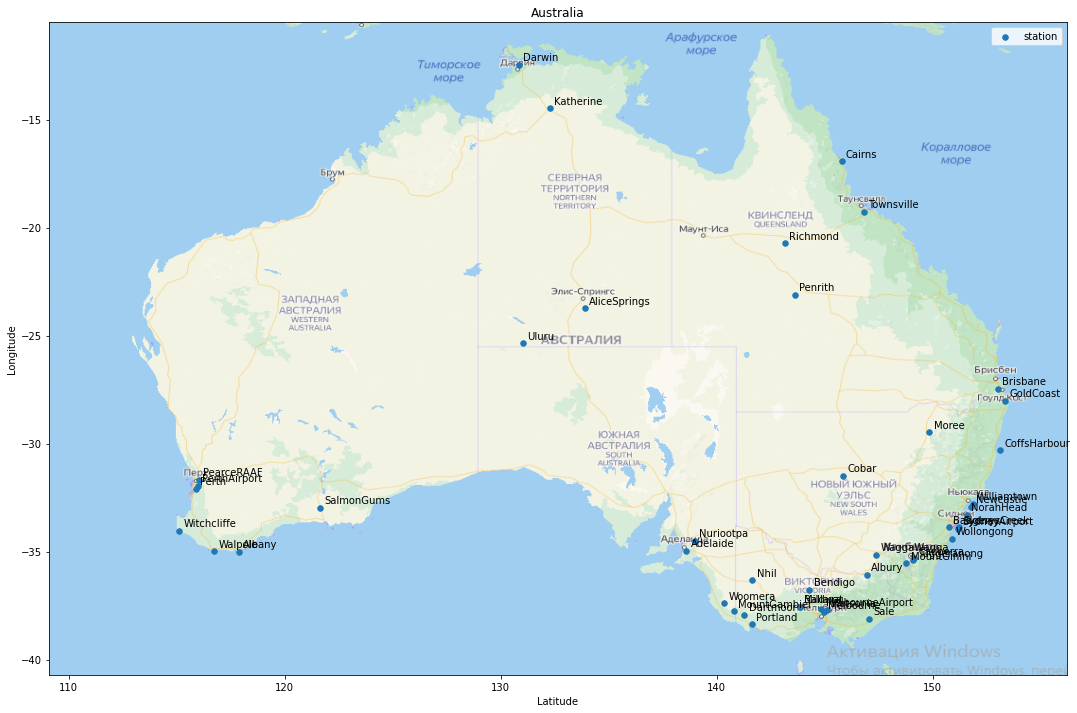

In [19]:
australia_map = img.imread('australia_map.png')
sdf.plot(kind='scatter', x='latitude', y='longitude', alpha=1, 
        s=30, label='station', figsize=(20,12))
x = 109.1
y =-40.7
plt.imshow(australia_map, extent=[109.1, 156.2, -40.7, -10.5], alpha=1)
for station in stations:
    plt.annotate(f'{station}', xy=(np.flip(stations[station])+0.2))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Australia")
plt.legend() 
plt.show()

При анализе карты мы видим, что многие станции находятся вблизости друг от друга и можно предположить, что значения измеряемых параметров на этих стациях близки.

In [20]:
first_station, second_station = 'AliceSprings', 'Uluru'
x1, y1 = stations[first_station]
x2, y2 = stations[second_station]
distance = np.math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
print(f'Расстояние от {first_station} до {second_station} составляет {distance:.2f}')

Расстояние от AliceSprings до Uluru составляет 3.28


In [21]:
# Присвоим станциям номера
stations = {i: stations[key] for i, key in enumerate(stations)}

In [22]:
def search_nearest_station(first_station, max_distance):
    """
    Осуществляет поиск ближайших стаций в заданном радиусе.
    На выходе отсорированный по удаленности список станций.
    """
    new_stations = stations.copy() # создадим корию словоря со станциями
    distance_dict = {} # Создадим пустой словарь для расстояний между станциями
    x1, y1 = stations[first_station] # координаты первой станции
    new_stations.pop(first_station) # удалим ее из копии словоря со станциями
    for station in new_stations: # для каждой стации 
        x2, y2 = new_stations[station] # определим ее координаты
        # и измерием расстояние до первой станции 
        distance = np.math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        # добавим станцию и расстояние в словарь 
        distance_dict[station] = round(distance, 3)
    # сформируем отсорированный по расстояниям список станций находящихся в 
    # пределах заданного радиуса
    new_stations = np.array([key for key, value in sorted(distance_dict.items(), key=lambda item: item[1])
                             if value < max_distance])
    return new_stations
    
search_nearest_station(40, 2)

array([39, 38])

Сформируем списоки соседних стаций для каждой стации в радиусе 2 градуса

In [25]:
max_distance = 2
stations_distance_list = np.array([[station, search_nearest_station(station, max_distance)] for station in stations])
stations_distance_list[:3]

array([[0, array([12, 17])],
       [1, array([11, 10, 14,  6,  5, 13])],
       [2, array([], dtype=float64)]], dtype=object)

In [26]:
def my_fillna(i, j):
    """
    Ищет значение на ближейшей станции
    """
    value = df.iloc[i, j] # координаты значения
    date, location = df.iloc[i, :2] # даты и место измерения
    stations_list = stations_distance_list[int(location), 1] # список ближайших станций
    while stations_list.shape[0]: # если станции есть
        # получаем значение искомого параметра с соседней станции в этот день
        new_value = df.loc[(df['Date'] == date) & (df['Location'] == stations_list[0]), df.columns[j]]
        if len(new_value) and not np.isnan(new_value.iloc[0]): # если найдено значение
            value = new_value.iloc[0] # меняем его на новое
            break # выходим из цикла
        # если значение не найдено, проверяем следующую станцию
        else: stations_list = stations_list[1:]  
    return value

Заполним пропуски

In [32]:
%%time
for i in tqdm(np.arange(df.shape[0])): # по строкам
    for j in np.arange(df.shape[1]): # по столбцам
        if np.isnan(df.iloc[i, j]): # если не np.NaN 
            df.iloc[i, j] = my_fillna(i, j) # заменяем на значение с ближайшей станции
                                            # если конечно стация есть
                                            # и если есть значение

  0%|          | 0/145460 [00:00<?, ?it/s]

Wall time: 15min 27s


Оставшиеся пропуски заменим на медианные значения в месте измерения

In [33]:
for col in df.columns:
    wdf = pd.DataFrame(df.groupby(['Location'])[col].median().rename(f'{col}ByLocation')).reset_index()
    df = df.merge(wdf, on=['Location'], how='left')
    df[col].fillna(df[f'{col}ByLocation'], inplace=True)
    df.drop(f'{col}ByLocation', axis=1, inplace=True)

In [35]:
# copy_df = df
# df = copy_df

### Удаление пропущенных значений

In [52]:
pd.DataFrame(df.isna().sum(), columns=['skips'])

,skips
Date,0
Location,0
longitude,0
latitude,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,10627
Sunshine,15214
WindGustDir,0


In [53]:
a, b = np.array(df.dropna(axis=0).shape) - np.array(df.dropna(axis=1).shape)
print(f'Количиство строк с пропусками    - {abs(a)}')
print(f'Количество столбцов с пропусками - {abs(b):>5}')

Количиство строк с пропусками    - 15214
Количество столбцов с пропусками -     6


In [54]:
df['Location'].nunique() == df.dropna(axis=0)['Location'].nunique()

False

Если удалить данные строки с пропущенными значениями, то построенная модель не будет учитывать данные некоторых локаций, поэтому удалим признаки.

In [56]:
df.dropna(axis=1, inplace=True)
df.isna().sum().sum()

0

### Построение модели

In [57]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('RainTomorrow', axis=1), 
    df['RainTomorrow'], 
    stratify = df['RainTomorrow'],
    random_state=0
)

Построим несколько моделей

Подберем наилучшие параметры

In [ ]:
params_XGB = {
    'silent': [1],
    'objective': ['binary:logistic'],
    'max_depth': [4, 6, 8, 10, 12, 14, 16], # def=6 (14)
    'eta': [0.01, 0.05, 0.1, 0.125, 0.15, 0.175, 0.2], # def=0.3 (0.15)
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.8], # def=1 (0.8)
    'min_child_weight': [1, 3, 5, 6, 7, 8, 10], # def=1 (1)
    'n': [580],
    'verbose': [1]
}

rand_search_XGB = RandomizedSearchCV(
    xgb.XGBClassifier(),
    param_distributions=params_XGB,
    n_iter = 15,
    cv=6,
    refit=False
)

search_XGB = rand_search_XGB.fit(X_train, y_train)
params_XGB = search_XGB.best_params_
params_XGB

In [ ]:
params_GBC = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], #700
    'min_samples_leaf': [1, 5, 6, 7, 8, 9], #7
    'max_depth': [None, 1, 3, 5, 7, 10], #10
    'random_state': [0]
}

rand_search_GBC = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=params_GBC,
    n_iter = 15,
    cv=6,
    refit=False
)

search_GBC = rand_search_GBC.fit(X_train, y_train)
params_GBC = search_GBC.best_params_
params_GBC

In [ ]:
params_RFC = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], #300
    'min_samples_leaf': [1, 5, 6, 7, 8, 9], #7
    'max_depth': [None, 5, 10, 15, 20, 25], #11
    'class_weight': ['balanced'],
    'random_state': [0]
}

rand_search_RFC = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=params_RFC,
    n_iter = 15,
    cv=6,
    refit=False
)

search_RFC = rand_search_RFC.fit(X_train, y_train)
params_RFC = search_RFC.best_params_
params_RFC

In [61]:
params_XGB = {
    'verbose': 1,
    'subsample': 0.8,
    'silent': 1,
    'objective': 'binary:logistic',
    'n': 580,
    'min_child_weight': 1, 
    'max_depth': 14,
    'eta': 0.15
}

params_GBC = {
    'n_estimators': 1000,
    'min_samples_leaf': 6,
    'max_depth': 10
}

params_RFC = {
    'n_estimators': 300,
    'min_samples_leaf': 7,
    'max_depth': 25,
    'class_weight': 'balanced'
}

params_LR = {
    'class_weight': 'balanced'
}

In [64]:
bst1 = xgb.XGBClassifier(**params_XGB)
bst1.fit(X_train, y_train)

bst2 = GradientBoostingClassifier(**params_GBC)
bst2.fit(X_train, y_train)

bst3 = RandomForestClassifier(**params_RFC)
bst3.fit(X_train, y_train)

bst4 = LogisticRegressionCV(**params_LR)
bst4.fit(X_train, y_train)

[16:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n", "silent", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegressionCV(class_weight='balanced')

Сделаем вероятностные предсказания по каждой из моделей

In [66]:
t1 = bst1.predict_proba(X_test)[:,1]
t2 = bst2.predict_proba(X_test)[:,1]
t3 = bst3.predict_proba(X_test)[:,1]
t4 = bst4.predict_proba(X_test)[:,1]

In [67]:
results = pd.DataFrame({'y_true': y_test, 
                        'XGB': t1, 
                        'GBC': t2, 
                        'RFC': t3, 
                        'LR' : t4,
                       })
results

,y_true,XGB,GBC,RFC,LR
129680,0.0,0.019179,0.006937,0.184453,0.594727
44025,0.0,0.101082,0.007038,0.238601,0.542215
125116,0.0,0.055770,0.004248,0.175710,0.351376
108364,0.0,0.011322,0.000370,0.079197,0.105035
26189,0.0,0.023113,0.003305,0.124316,0.196031
...,...,...,...,...,...
117955,0.0,0.002985,0.000116,0.031270,0.056905
54320,0.0,0.012701,0.002508,0.281820,0.941782
92874,0.0,0.004656,0.000201,0.156355,0.101789
86051,0.0,0.006543,0.000387,0.055762,0.147077


Добавим всевозможные комбинации наших моделей

In [68]:
from itertools import combinations
columns = results.columns[1:]
n = results.columns.shape[0] - 1
temp = []
while n > 1:
    temp += list(combinations(columns, n))
    n -= 1

new_res_cols = {'AVG_'+'_'.join(i).lower(): list(i) for i in temp}
    
for col in new_res_cols:
    results[col] = results[new_res_cols[col]].mean(axis=1)
    
results

,y_true,XGB,GBC,RFC,LR,AVG_xgb_gbc_rfc_lr,AVG_xgb_gbc_rfc,AVG_xgb_gbc_lr,AVG_xgb_rfc_lr,AVG_gbc_rfc_lr,AVG_xgb_gbc,AVG_xgb_rfc,AVG_xgb_lr,AVG_gbc_rfc,AVG_gbc_lr,AVG_rfc_lr
129680,0.0,0.019179,0.006937,0.184453,0.594727,0.201324,0.070190,0.206948,0.266120,0.262039,0.013058,0.101816,0.306953,0.095695,0.300832,0.389590
44025,0.0,0.101082,0.007038,0.238601,0.542215,0.222234,0.115573,0.216778,0.293966,0.262618,0.054060,0.169841,0.321649,0.122819,0.274626,0.390408
125116,0.0,0.055770,0.004248,0.175710,0.351376,0.146776,0.078576,0.137131,0.194285,0.177111,0.030009,0.115740,0.203573,0.089979,0.177812,0.263543
108364,0.0,0.011322,0.000370,0.079197,0.105035,0.048981,0.030296,0.038909,0.065185,0.061534,0.005846,0.045259,0.058179,0.039783,0.052702,0.092116
26189,0.0,0.023113,0.003305,0.124316,0.196031,0.086691,0.050245,0.074150,0.114487,0.107884,0.013209,0.073715,0.109572,0.063811,0.099668,0.160173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117955,0.0,0.002985,0.000116,0.031270,0.056905,0.022819,0.011457,0.020002,0.030387,0.029430,0.001550,0.017128,0.029945,0.015693,0.028510,0.044087
54320,0.0,0.012701,0.002508,0.281820,0.941782,0.309703,0.099010,0.318997,0.412101,0.408703,0.007605,0.147261,0.477241,0.142164,0.472145,0.611801
92874,0.0,0.004656,0.000201,0.156355,0.101789,0.065750,0.053738,0.035549,0.087600,0.086115,0.002429,0.080506,0.053222,0.078278,0.050995,0.129072
86051,0.0,0.006543,0.000387,0.055762,0.147077,0.052442,0.020897,0.051336,0.069794,0.067742,0.003465,0.031152,0.076810,0.028075,0.073732,0.101419


In [69]:
def get_metrics(preds, y_test=y_test):
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    fscore = (2 * precision * recall) / (precision + recall)
    # индекс наибольшего значения fscore
    ix = np.argmax(fscore)
    print('Best Threshold = %.3f, F-Score = %.3f, Precision = %.3f, Recall = %.3f, Roc-AUC = %.3f' \
          % (thresholds[ix], fscore[ix], precision[ix], recall[ix], roc_auc_score(y_test, preds)))
    return {'Best Threshold': thresholds[ix], 'F-Score': fscore[ix], 'Precision': precision[ix], 
            'Recall': recall[ix], 'Roc-AUC': roc_auc_score(y_test, preds)}

Расчитаем метрики каждой из моделей и их комбинаций и выберем лучшую

In [70]:
best_model = results.columns[1]
print(f'{best_model:<20}', end=' ')
best_model_Roc_AUC = get_metrics(results[best_model])['Roc-AUC']
for col in results.columns[2:]:
    print(f'{col:<20}', end=' ')
    model_metrics = get_metrics(results[col])
    if model_metrics['Roc-AUC'] > best_model_Roc_AUC:
        best_model = col
        print(f'{best_model:<20}', end=' ')
        best_model_Roc_AUC = get_metrics(results[best_model])['Roc-AUC']
        
print(f'\nbest_model - {best_model} \nROC-AUC = {round(best_model_Roc_AUC, 3)}')

XGB                  Best Threshold = 0.287, F-Score = 0.674, Precision = 0.654, Recall = 0.696, Roc-AUC = 0.887
GBC                  Best Threshold = 0.140, F-Score = 0.684, Precision = 0.653, Recall = 0.718, Roc-AUC = 0.892
GBC                  Best Threshold = 0.140, F-Score = 0.684, Precision = 0.653, Recall = 0.718, Roc-AUC = 0.892
RFC                  Best Threshold = 0.458, F-Score = 0.654, Precision = 0.604, Recall = 0.712, Roc-AUC = 0.880
LR                   Best Threshold = 0.593, F-Score = 0.614, Precision = 0.566, Recall = 0.669, Roc-AUC = 0.842
AVG_xgb_gbc_rfc_lr   Best Threshold = 0.403, F-Score = 0.678, Precision = 0.668, Recall = 0.688, Roc-AUC = 0.885
AVG_xgb_gbc_rfc      Best Threshold = 0.321, F-Score = 0.681, Precision = 0.665, Recall = 0.699, Roc-AUC = 0.892
AVG_xgb_gbc_lr       Best Threshold = 0.382, F-Score = 0.681, Precision = 0.682, Recall = 0.680, Roc-AUC = 0.882
AVG_xgb_rfc_lr       Best Threshold = 0.461, F-Score = 0.664, Precision = 0.644, Recall = 0.685,